<h1>Analysis of COVID Cases in South East Asian Countries</h1>

<h2>Libraries</h2>
Necessary libraries for handling and visualizing data must first be imported.

In [126]:
import os

#Data analysis and data prep
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Data Frames</h2>
The data to be analyzed involves time series on confirmed cases, deaths and recovered cases. The global datasets from <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" target="_blank">Kaggle</a> were used in this analysis.




In [127]:
main_df = pd.read_csv('covid_19_data.csv')

confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')

deaths = pd.read_csv('time_series_covid_19_deaths.csv')

recovered = pd.read_csv('time_series_covid_19_recovered.csv')

<h2>Data Preparation</h2>
Since this study is focused on South East Asian countries, the dataframes must be trimmed to only the relevant countries.

In [128]:
#SEA countries
SEA = [ 'Indonesia', 'Vietnam', 'Thailand', 'Singapore', 'Philippines', 'Malaysia', 'Laos', 'Burma', 'Cambodia', 'Brunei', 'Timor-Leste']

#trimming dataframes
main_df = main_df[main_df['Country/Region'].isin(SEA)]
confirmed = confirmed[confirmed['Country/Region'].isin(SEA)]
deaths = deaths[deaths['Country/Region'].isin(SEA)]
recovered = recovered[recovered['Country/Region'].isin(SEA)]

In [129]:
#checking main data frame
main_df.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,4.0,0.0,2.0
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,4.0,0.0,2.0
76,77,01/23/2020,NaN,Singapore,1/23/20 17:00,1.0,0.0,0.0


In [130]:
#checking time series data frame
confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
31,NaN,Brunei,4.5353,114.7277,0,0,0,0,0,0,...,185,185,185,185,185,185,185,185,185,186
34,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,141709,141728,141735,141750,141761,141783,141816,141841,141875,141890
37,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,484,484,533,568,593,633,697,741,767,805


The entries for each country do not contain information for the specific province or state. This means that the Province/State column can also be removed from the data frames. The SNo column in main_df also becomes irelevant so it can be removed as well. 

In [131]:
#dropping SNo and Province/State columns
main_df = main_df.drop(['SNo','Province/State'], axis=1)
confirmed = confirmed.drop(['Province/State'],axis=1)
deaths = deaths.drop(['Province/State'],axis=1)
recovered = recovered.drop(['Province/State'],axis=1)

Lastly, the data frames must be corrected if there are null or invalid values

In [132]:
invalid = [main_df.isnull().values.any(),confirmed.isnull().values.any(),deaths.isnull().values.any(),recovered.isnull().values.any()]
print(invalid)

[False, False, False, False]


Fortunately, there seem to be no null or invalid entries. The data frames are ready to be analyzed.

<h2>Analysis and Visualizations</h2>

<h3>Updates</h3>
The frequency of updates from each of the countries can be compared using a horizontal bar graph. This gives us an idea on how up-to-date the reported number of cases are for each country. 

The graph below shows that 6 SEA countries update almost everyday while the other 5 are not as consistent but still gave a fair amount of updates. No country seems to lacking too much in update frequency, which indicates that the data set has a timely representation of the covid cases from each country.

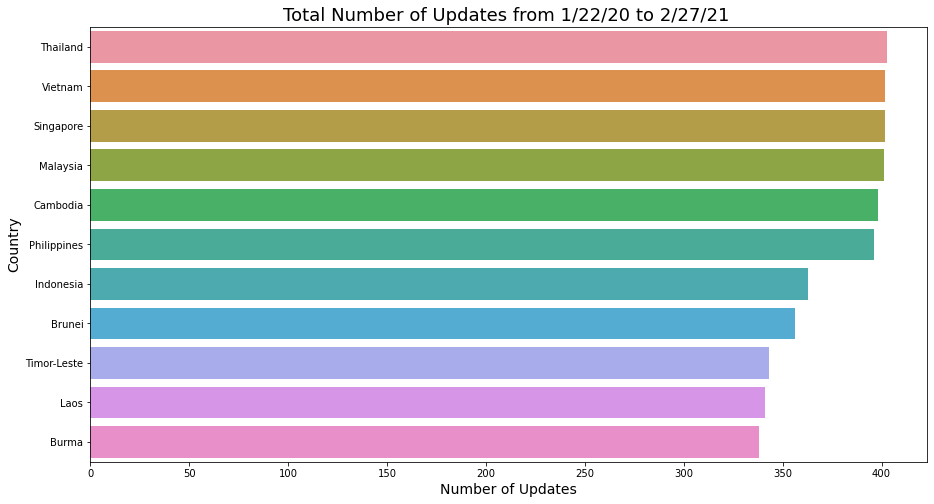

In [133]:
#count updates
report_count = main_df['Country/Region'].value_counts()

#visualize
plt.figure(figsize=(15,8))
sns.barplot(x=report_count.values,y=report_count.index)
plt.ylabel('Country', fontsize=14)
plt.xlabel('Number of Updates', fontsize=14)
plt.title('Total Number of Updates from 1/22/20 to 2/27/21 ', fontsize=18)
plt.show()


<h3>Confirmed Cases</h3>
The COVID situation in each country can be observed by looking at the total number of COVID cases and the increase of cases over time. Below is a bar graph showing the total recorded cases for each country within the data collection period.

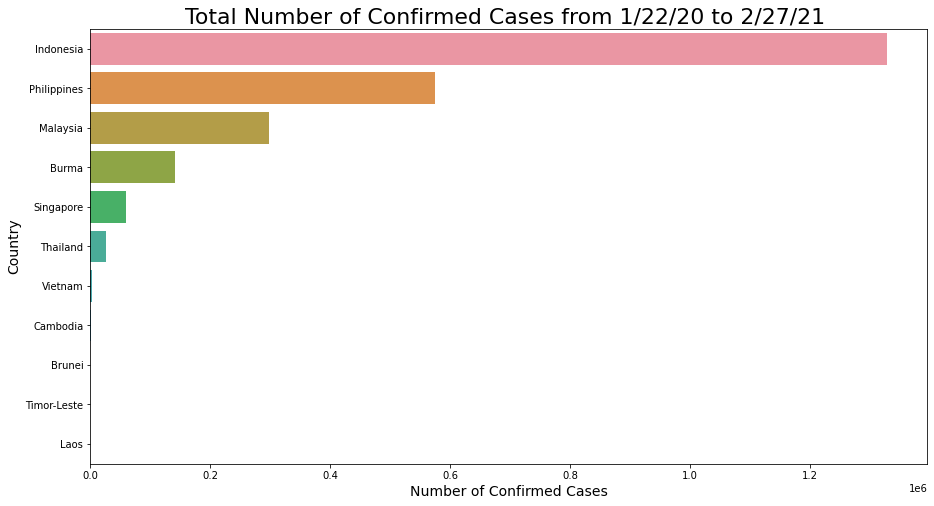

In [196]:
#sort by total cases
confirmed = confirmed.sort_values('2/27/21',ascending=False)

#visualize
plt.figure(figsize=(15,8))
sns.barplot(x=confirmed['2/27/21'],y=confirmed['Country/Region'])
plt.ylabel('Country', fontsize=14)
plt.xlabel('Number of Confirmed Cases', fontsize=14)
plt.title('Total Number of Confirmed Cases from 1/22/20 to 2/27/21 ', fontsize=22)
plt.show()

It can be observed that there is a significant difference in the number of COVID cases among nations. Indonesia, Philippines and Malaysia have the most number of cases in the SEA region. Vietnam, Cambodia, Brunei, Timor-Leste and Laos appear to be in better situations since their case totals are far below that of the other SEA countries. 

There are many outside factors that affect the total number of recorded cases such as population, population density and topography. In order to put the case totals into better context, another chart is constructed to show the percentage of the entire population infected by COVID. The 2020 population estimates are taken from  <a href="https://www.worldometers.info/world-population/population-by-country/">Worldometer</a>.

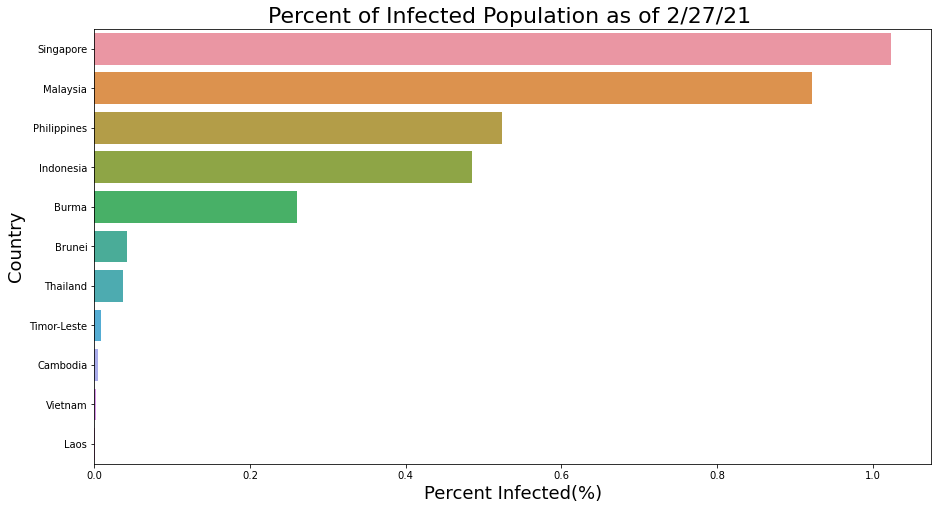

In [199]:
#population estimates 2020
pop = [273523615,109581078,32365999,54409800,5850342,69799978,97338579,16718965,437479,1318445,7275560]

#calculate percent 
confirmed = confirmed.sort_values('2/27/21',ascending=False)
confirmed_percent = confirmed['2/27/21']*100/pop
confirmed['Percent'] = confirmed_percent.values

#sort
confirmed = confirmed.sort_values('Percent',ascending=False)

#visualize
plt.figure(figsize=(15,8))
sns.barplot(x=confirmed['Percent'],y=confirmed['Country/Region'])
plt.ylabel('Country', fontsize=18)
plt.xlabel('Percent Infected(%)', fontsize=18)
plt.title('Percent of Infected Population as of 2/27/21 ', fontsize=22)
plt.show()

Although Indonesia and the Philippines have the highest raw number of recorded COVID cases, they only have around 0.5% of their population infected. It is actually Singapore and Malaysia who have the highest percentage of infection (around 1% of the population). Other countries that have lower case totals also have low percentages of infection. 

<h3>Infections Over Time</h3>
Plotting the time series of the reports can provide a good visualization of the rise in COVID cases within countries during the data collection period. Below is a line plot of the total number of recorded cases over time for each country. Since daily updates could result to noisy data, a rolling average with 7 days(1 week) is applied to the plots. The plots for all the countries are then superimposed in order to compare them. 

Text(0.5, 1.0, 'Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ')

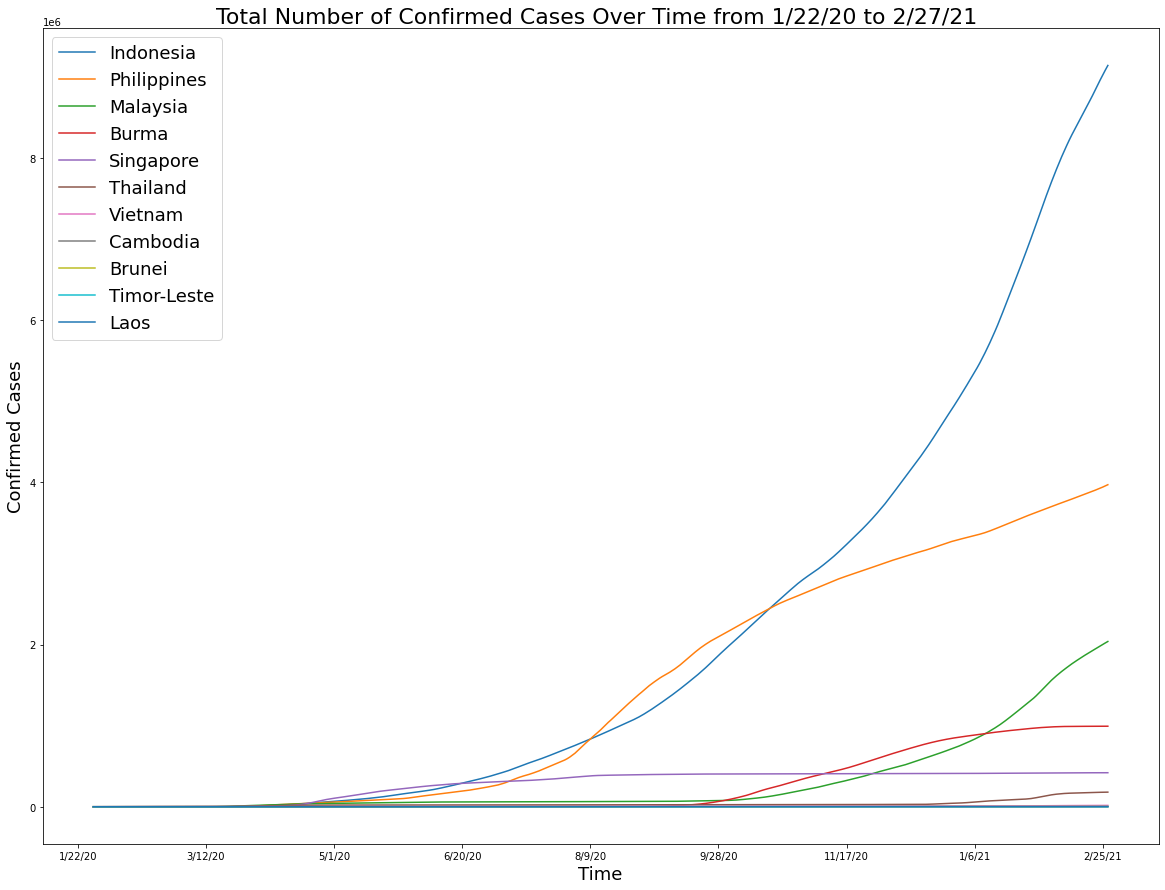

In [197]:
#tranpose for easier plotting
confirmed_t = confirmed.transpose()


fig = plt.figure(figsize=(20,15))

#plots with rolling average
for i in confirmed.index:
    confirmed_t[i][3:].rolling(7).sum().plot()

#visualize
plt.xlabel('Time', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.legend(confirmed['Country/Region'], loc ="upper left",fontsize=18)
plt.title('Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ', fontsize=22)

The resulting plot above shows that the growth in COVID cases was not uniform for all the countries in the SEA region. Some countries have experienced a steep increase early 2020 while others had it later on. The response to the primary infections also seem to differ among nations as some countries' case totals have continued to increase while others' have plateaued. 

Text(0.5, 1.0, 'Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ')

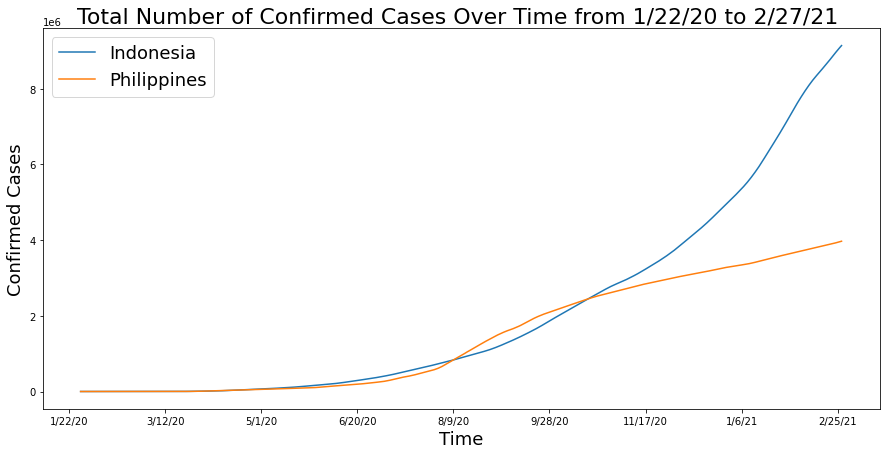

In [217]:
#Indonesia and Philippines - high infections
fig = plt.figure(figsize=(15,7))

#plots with rolling average
for i in [147,208]:
    confirmed_t[i][3:].rolling(7).sum().plot()

#visualize
plt.xlabel('Time', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.legend(['Indonesia','Philippines'], loc ="upper left",fontsize=18)
plt.title('Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ', fontsize=22)

Indonesia and the Philippines have similar experiences with regards to the rise in infections. Both countries saw a steep increase around August to September 2020 and their number of cases have kept incresing since then, with Indonesia having a significantly higher number of cases as of February 2021.

Text(0.5, 1.0, 'Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ')

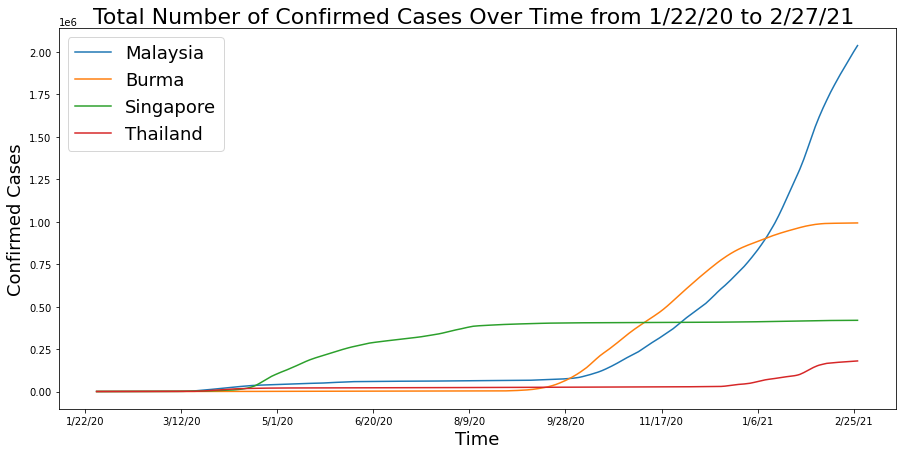

In [223]:
#Malaysia,Burma,Singapore,Thailand - middle 
fig = plt.figure(figsize=(15,7))

#plots with rolling average
for i in [174,34,226,243]:
    confirmed_t[i][3:].rolling(7).sum().plot()

#visualize
plt.xlabel('Time', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.legend(['Malaysia','Burma','Singapore','Thailand'], loc ="upper left",fontsize=18)
plt.title('Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ', fontsize=22)

Singapore has the earliest spike in COVID cases in April 2020; however, the infections seem to have plateaued by September 2020. This finding could explain why Singapore has decided to resume face-to-face classes and work already.

Malaysia and Burma experienced spikes in COVID cases around October 2020. By November 2020, their case totals have already surpassed that of Singapore, which started getting cases months before.

Thailand seems to be mostly untouched by the pandemic in 2020, with a surge in cases only occuring in February 2021.

Text(0.5, 1.0, 'Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ')

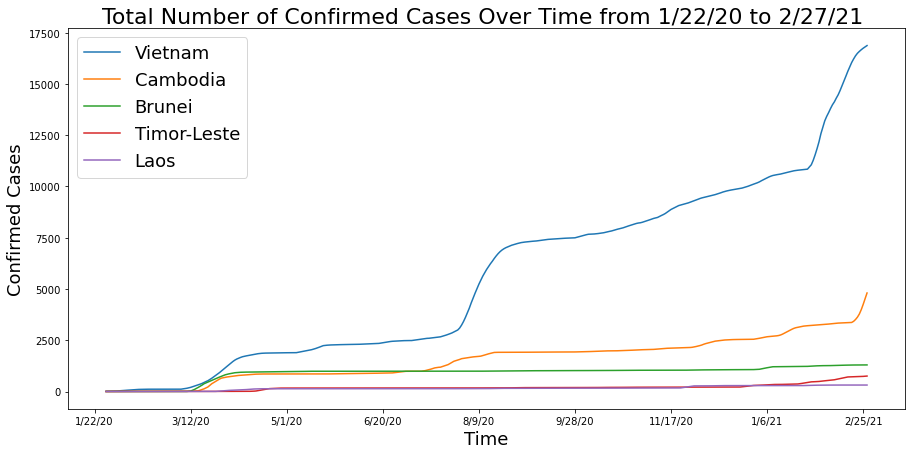

In [220]:
#Vietnam,Cambodia,Brunei,Timor-Leste,Laos - low infections
fig = plt.figure(figsize=(15,7))

#plots with rolling average
for i in [269,37,31,244,162]:
    confirmed_t[i][3:].rolling(7).sum().plot()

#visualize
plt.xlabel('Time', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.legend(['Vietnam','Cambodia','Brunei','Timor-Leste','Laos'], loc ="upper left",fontsize=18)
plt.title('Total Number of Confirmed Cases Over Time from 1/22/20 to 2/27/21 ', fontsize=22)

The rest of the SEA countries have to be plotted seperately because their case totals are significantly lower.

An intersting finding is that Vietnam,Camboodia and Brunei have experienced their initial spikes of COVID cases at the same time, around March to Arpil 2020. Furthermore, Vietnam and Cambodia even have similar spikes in August 2020 and January 2021. Brunei howver, has maintained its case total from the initial spike and appears to have contained the COVID situation. The similarity between these countries may be attributed to their geographic proximity to one another.

Timor-Leste and Laos both are relatively unaffected by the COVID pandemic. Interestingly, Laos is between Thailand, Vietnam and Cambodia, which have much more cases. This fact can point to Laos being a good model for effective pandemic policies.

<h3>Deaths</h3>
A bar chart of the mortality rate within each country is given below. The deaths are represented as percentage of the total recorded cases in order to put the death count into better context rather than simply using the raw number of COVID deaths. This provides one cursory indication of susceptible the population is.

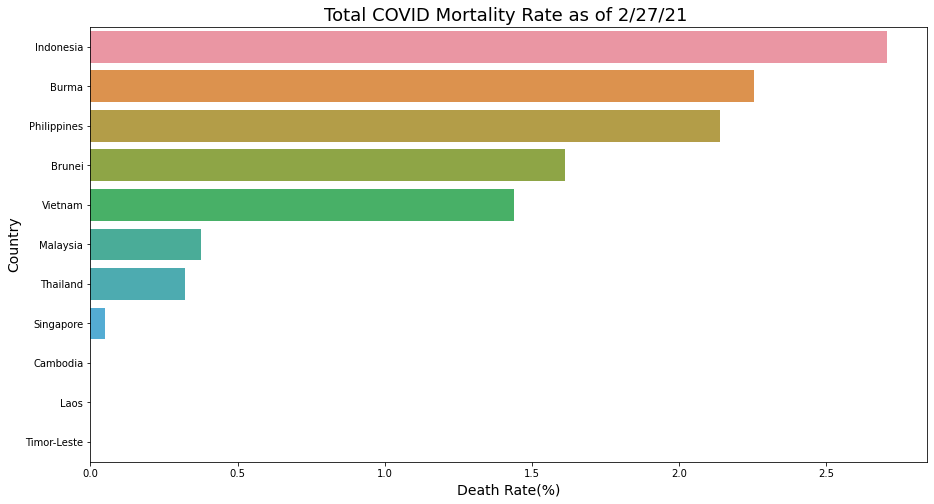

In [136]:
#calculate total death rate
death_rate = (deaths['2/27/21']/confirmed['2/27/21']*100)
deaths['Rate'] = death_rate.values
deaths = deaths.sort_values('Rate',ascending=False)


#visualize
plt.figure(figsize=(15,8))
sns.barplot(x=deaths['Rate'],y=deaths['Country/Region'])
plt.ylabel('Country', fontsize=14)
plt.xlabel('Death Rate(%)', fontsize=14)
plt.title('Total COVID Mortality Rate as of 2/27/21 ', fontsize=18)
plt.show()

Indonesia, Burma and the Philippines have mortality rates of over 2%. These nations are considered as third-world countries, as such, it may be said that the high mortality rates can be attributed to the high number of cases coupled with a lack of care infrastructure and treatment.

Brunei and Vietnam also have a high mortality rate of around 1.5% and may be in similar situations as the countries above.

Interestingly, Singapore, although having the highest percentage of the population infected, has a very low mortality rate. This supports the earlier finding that Singapore was able to plateau their COVID cases. This may be attributed to Singapore's available facilities and treatments and ease of government control, being a one-city nation.

<h3>Recoveries</h3>
A bar chart of the recovery rate within each country is given below. The recoveries are represented as percentage of the total recorded cases in order to put the recovery count into better context rather than simply using the raw number of recoveries. This may indicate how well the country can provide care and treatment to its citizens.  

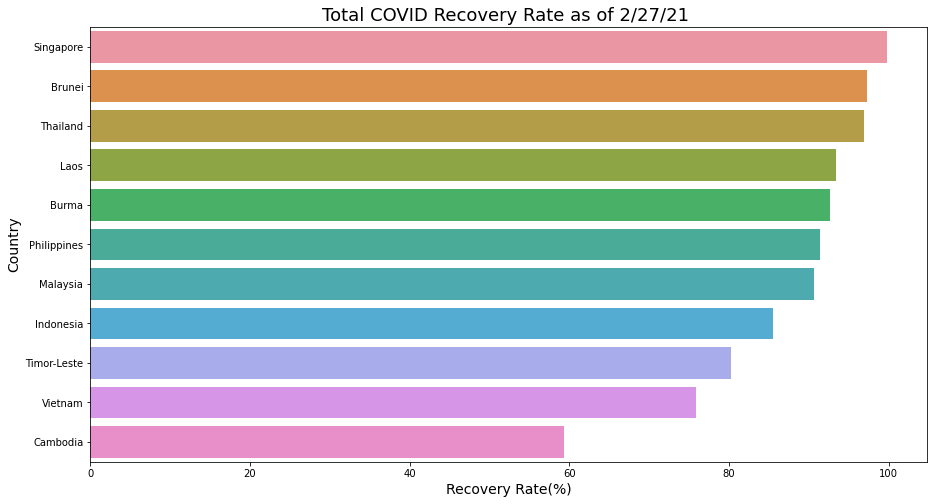

In [168]:
#calculate total recovery rate
#country indices are inconsistent between dataframes so additional sorting is needed
rdf = recovered[['Country/Region','2/27/21']].sort_values('Country/Region').reset_index()
cdf = confirmed[['Country/Region','2/27/21']].sort_values('Country/Region').reset_index()
recovery_rate = rdf['2/27/21']/cdf['2/27/21']*100

recovered = recovered.sort_values('Country/Region').reset_index()
recovered['Rate'] = recovery_rate.values
recovered = recovered.sort_values('Rate',ascending=False)


#visualize
plt.figure(figsize=(15,8))
sns.barplot(x=recovered['Rate'],y=recovered['Country/Region'])
plt.ylabel('Country', fontsize=14)
plt.xlabel('Recovery Rate(%)', fontsize=14)
plt.title('Total COVID Recovery Rate as of 2/27/21 ', fontsize=18)
plt.show()

Most SEA countries have promising recovery rates of over 90%.

Indonesia, having the most number of cases, still has a recovery rate of over 85%.

Cambodia is one outlier having only 59% recovery rate but with its very low number of cases, this statistic may not be too alarming as of now.

<h2>Conclusions</h2>
In this analysis, case statistics were used to compare the pandemic situations among South East Asian countries. Time series were used to describe the timely growth of recorded cases and identify when the initial spikes of COVID occured for each country. There were also interesting findings that are supported by other aspects such as economy, topography and geographic location. 

Studying COVID reports from different countries can provide a bigger picture of the pandemic as it unfolds. It can help scientists, doctors and health workers keep track of the growing number of infections and identify countries or regions which are heavily affected by the disease. Countries that are handling the pandemic well can similarly be identified to serve as models for implementing policies that effectively lessen the blow of the pandemic.